In [1]:
%pip install --upgrade pip
%pip install findspark 
#%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
findspark.init()

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col, mean, count

import matplotlib.pyplot as plt
import numpy as np

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession.builder.getOrCreate()

23/02/20 08:33:56 WARN Utils: Your hostname, codespaces-a4a4a4 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/02/20 08:33:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/20 08:33:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
filepath = '/workspaces/codespaces-jupyter/data'

schema = StructType([
    StructField("housing_median_age",IntegerType()),
    StructField("median_income",IntegerType()),
    StructField("Premiums",DoubleType()),
    StructField("Claims ",DoubleType()),
    StructField("Loss",DoubleType()),
])
#df = (spark.read.format("csv").options(header="true").schema(schema).load(filepath))
df = (spark.read.format("csv").options(header="true").load(filepath))
df.createOrReplaceTempView('housing')


df = df.withColumn("housing_median_age", col("housing_median_age").cast(IntegerType()))
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: integer (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)
 |-- ocean_proximity: string (nullable = true)



About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [6]:
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|                41|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|                21|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|                52|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|                52|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [7]:
# With SQL
query = 'SELECT INT(housing_median_age), AVG(median_house_value) AS avg_median_house_value FROM housing GROUP BY housing_median_age ORDER BY housing_median_age'
spark_result = spark.sql(query)#.collect()

age = np.array(spark_result.select("housing_median_age").collect())[:,0]
house_value = np.array(spark_result.select("avg_median_house_value").collect())[:,0]

In [8]:
# With spark methods

# Agréger les données en fonction de la variable 1 et calculer la moyenne de la variable 2
agg_data = df.groupBy("housing_median_age").agg(mean("median_house_value").alias("avg_median_house_value"), count("housing_median_age").alias("count_housing"))

# Trier les résultats par variable1
sorted_agg_data = agg_data.orderBy("housing_median_age")

age2 = np.array(sorted_agg_data.select("housing_median_age").collect())[:,0]
house_value2 = np.array(sorted_agg_data.select("avg_median_house_value").collect())[:,0]

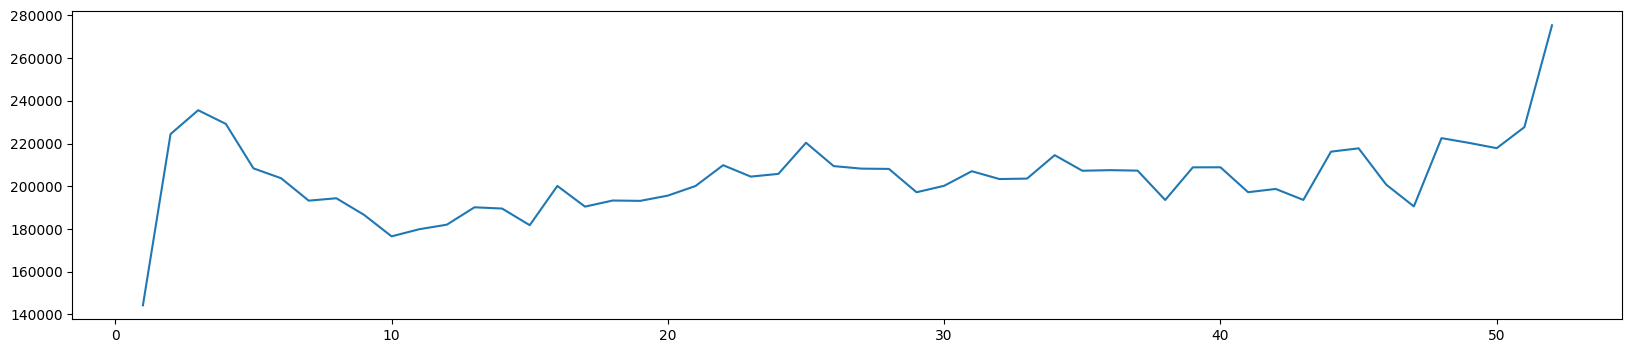

In [9]:
plt.rcParams["figure.figsize"] = (20,4)
plt.plot(age2,house_value2)

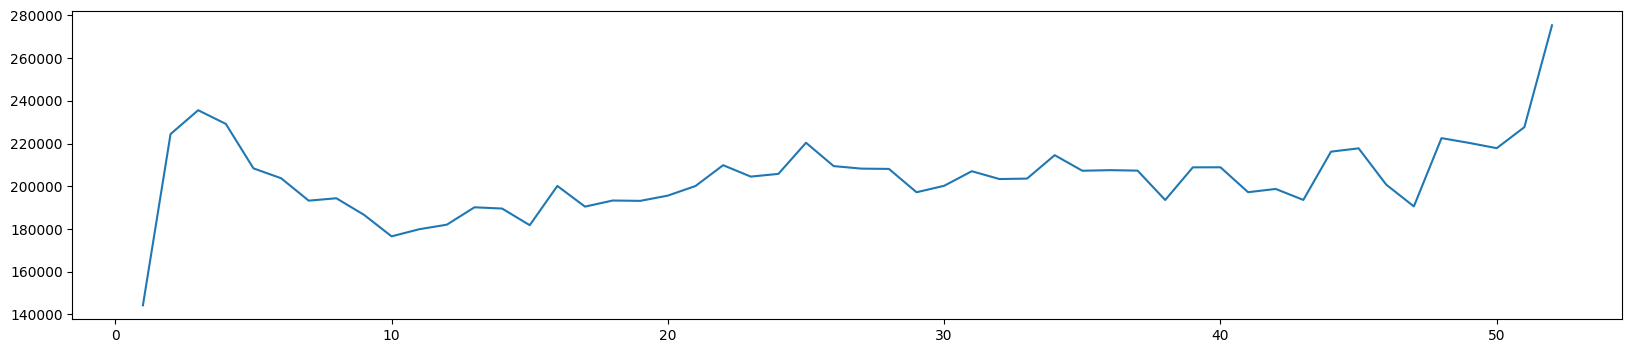

In [10]:
plt.plot(age,house_value)

In [11]:
spark.sql("SELECT mean(housing_median_age) as mean_housing_age from housing").first().mean_housing_age

28.639486434108527

In [12]:
df.agg(mean("housing_median_age").alias("mean_housing_age")).first().mean_housing_age

28.639486434108527

In [13]:
row = 0
spark_result.select("housing_median_age", "avg_median_house_value").collect()

[Row(housing_median_age=1, avg_median_house_value=144300.0),
 Row(housing_median_age=2, avg_median_house_value=224475.91379310345),
 Row(housing_median_age=3, avg_median_house_value=235643.5806451613),
 Row(housing_median_age=4, avg_median_house_value=229235.13612565445),
 Row(housing_median_age=5, avg_median_house_value=208417.65573770492),
 Row(housing_median_age=6, avg_median_house_value=203794.39375),
 Row(housing_median_age=7, avg_median_house_value=193296.0342857143),
 Row(housing_median_age=8, avg_median_house_value=194414.58252427186),
 Row(housing_median_age=9, avg_median_house_value=186672.7024390244),
 Row(housing_median_age=10, avg_median_house_value=176580.70454545456),
 Row(housing_median_age=11, avg_median_house_value=179907.90157480314),
 Row(housing_median_age=12, avg_median_house_value=182046.23529411765),
 Row(housing_median_age=13, avg_median_house_value=190181.80794701987),
 Row(housing_median_age=14, avg_median_house_value=189597.10436893205),
 Row(housing_median_